In [23]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
from collections import Counter
import re
from itertools import chain

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
df = pd.read_csv("mid_data/Multi_v1.csv")
print(len(df))

3026808


## Phonetic Inventory

In [25]:
pronunciation_list = df['pronunciation'].astype(str).tolist()
print(len(pronunciation_list))

3026808


In [26]:

# Use Counter to efficiently count symbols
symbols_hist = Counter("".join(pronunciation_list))

# Sort the symbols by frequency in descending order
symbols = sorted(symbols_hist, key=symbols_hist.get, reverse=True)
languages = (1.0 / df["language"].value_counts(normalize=True)).to_dict()
print(symbols_hist)

Counter({'.': 2331183, 'ˈ': 2082090, 't': 1794688, 'i': 1774784, 'a': 1733310, 's': 1466936, 'n': 1214294, 'e': 1153513, 'k': 1125613, 'o': 935331, 'l': 867256, 'u': 845742, 'ː': 832902, 'm': 769420, ' ': 708263, 'r': 700426, 'p': 684523, 'ɪ': 662916, 'ə': 655840, 'ʲ': 639642, 'd': 601858, '⁵': 588894, 'j': 580664, 'ɑ': 539246, 'ɛ': 518156, '͡': 501419, '²': 431884, '̯': 430753, '¹': 423412, 'ɔ': 419807, 'ɐ': 414784, '³': 395020, 'ˌ': 389312, '̞': 384255, 'ʁ': 380408, 'b': 371144, 'v': 353763, '⁴': 347418, '̪': 334499, 'ɾ': 328391, 'f': 288676, 'z': 278801, '⁻': 265036, 'ʊ': 262827, 'ɡ': 261644, '̃': 258300, 'ɨ': 243684, 'ɕ': 241172, 'ŋ': 230890, '̠': 221737, 'ʃ': 217900, '̝': 189769, 'ʰ': 177794, ')': 171051, '(': 171047, 'w': 168435, 'h': 158618, 'ʂ': 154290, '˧': 146649, 'y': 145155, 'ä': 140429, 'æ': 132456, 'x': 117439, 'ʒ': 115892, '̚': 114992, 'ɫ': 104752, 'ʔ': 97716, 'ʋ': 92895, '˨': 78486, '˩': 78226, 'ɲ': 68642, '˦': 65315, 'ð': 64493, 'ʐ': 60856, 'ẽ': 60406, '̟': 59777, 'ɒ':

In [27]:
# Initialize dictionaries to store frequencies of symbols per language
language_symbols_hist = {lang: {}.fromkeys(symbols_hist, 0) for lang in languages}
language_symbols = {}.fromkeys(languages, 0)

# Fill in the frequency data for each language from the DataFrame
for lang in languages:
    lang_df : pd.DataFrame = df[df['language'] == lang]
    lang_df_hist = Counter("".join(lang_df['pronunciation'].astype(str).tolist()))
    total_symbols = sum(lang_df_hist.values())
    normalized_hist = {symbol: count / total_symbols for symbol, count in lang_df_hist.items()}

    for symbol in symbols_hist.keys():
        if symbol in normalized_hist:
            language_symbols_hist[lang][symbol] = normalized_hist[symbol]
            language_symbols[lang] += 1

    


In [28]:
total = np.sum(list(symbols_hist.values()))
rare_symbols = []
final_symbols = []

rarity_threshold = 1 / (len(symbols_hist) * len(languages))  * 100

for x in symbols:
    percent = symbols_hist[x] / total * 100
    if percent < rarity_threshold:
        is_not_rare_in_some_language = False 
        for language in languages: 
            symbol_freq = language_symbols_hist[language][x]
            zipf_freq = symbol_freq / max(language_symbols_hist[language].values())
            if zipf_freq >= 1.0 / language_symbols[language]:
                is_not_rare_in_some_language = True 
                break 
        if is_not_rare_in_some_language:
            final_symbols.append(x)
        else: 
            rare_symbols.append(x)
    else:
        final_symbols.append(x)

print(rare_symbols)
symbols = final_symbols

['̍', '/', 'ɱ', 'ï', '→', 'ᵊ', '|', 'ʀ', 'ᵘ', '\xa0', 'ʍ', 'ɬ', 'ᵑ', 'ˡ', 'g', 'ᵐ', '∅', '̈', 'ⁿ', '͜', '̆', '⁰', '˞', '*', 'ꜜ', '˔', '̂', 'ỹ', 'N', 'ǀ', '́', 'ă', 'í', '̰', 'á', '>', '…', 'ó', '̺', '̜', '‖', 'é', 'ʼ', '̀', 'à', '̌', 'ˠ', 'ɶ', 'å', '𝆑', '一', 'ʙ', 'ŏ', 'ú', 'â', '↗', '̘', 'ò', 'Q', 'ɞ', '︎', 'ì', 'ᵈ', '͍', 'ñ', 'ɮ', 'ǃ', "'", 'ŭ', 'î', 'ĕ', 'C', '̄', 'ō', '1', '↓', '̙', '˗', '᷈', 'ü', 'ā', 'ʟ', 'ö', 'ʘ', 'ᵻ', 'ǁ', 'ĭ', 'ù', 'ě', 'ô', 'ǐ', 'ǎ', 'ê', 'û', 'ý', 'ǽ', 'ŷ', 'ỳ', 'ʜ', '⁹', 'ū', 'ẑ', 'V', '&', '不', '͇', 'ḿ', 'ʬ', '̽', 'ʩ', '𐞪', '↘', '꜔', '\u200b', 'ḁ', '%', '˕', '◌', '᷇', 'ɺ', 'ÿ', 'ˇ', 'ọ', 'ǒ', 'ỵ']


In [29]:
pattern = re.compile('|'.join(map(re.escape, rare_symbols)))

# Use apply to filter rows containing rare symbols
df_filtered = df[~df['pronunciation'].apply(lambda x: bool(pattern.search(str(x))))]
df = df_filtered

In [30]:
pronunciation_list = df
print(len(pronunciation_list))

3012774


In [31]:
print(len(symbols))

142


# Tokenizer

In [32]:
from solution.model import CharacterTokenizer, PhoneticTransformer, generate_square_subsequent_mask, PhoneticsDataset
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [33]:
pronunciation_tokenizer = CharacterTokenizer(symbols, 100)
vocab = pronunciation_tokenizer.get_vocab()

c:\Users\Joaquin\miniconda3\envs\agi\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device, len(vocab))

cuda 149


In [35]:
dataset = pronunciation_list.copy()  

dataset['pronunciation'] = dataset['pronunciation'].apply(lambda p: pronunciation_tokenizer.encode(str(p)).ids)


14.70335942888514 29.0 5.894667774037606
3 397


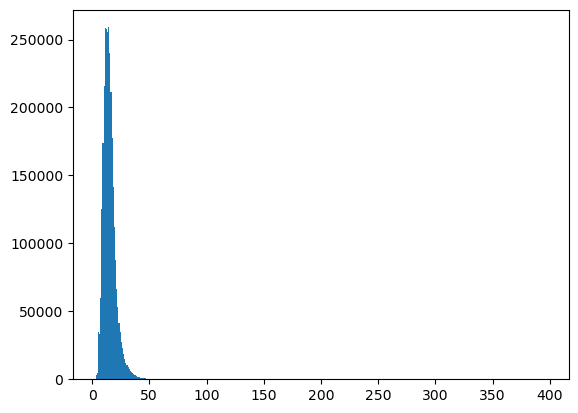

In [36]:
QUANTILE_THRESHOLD = 0.975

lengths = dataset["pronunciation"].apply(lambda x: len(x)).tolist()

print(np.mean(lengths), np.quantile(lengths, QUANTILE_THRESHOLD), np.std(lengths))
print(np.min(lengths), np.max(lengths))
plt.hist(lengths, np.max(lengths) - np.min(lengths))
plt.show()

In [37]:
# Remove any outliers
min_thresh = 3
max_thresh = np.quantile(lengths, QUANTILE_THRESHOLD)

mask = dataset["pronunciation"].apply(len).between(min_thresh, max_thresh)
filtered_dataset = dataset[mask]

dataset = filtered_dataset
print(len(dataset))

2944133


14.19110855385949 25.0 4.679203234846722
3 29


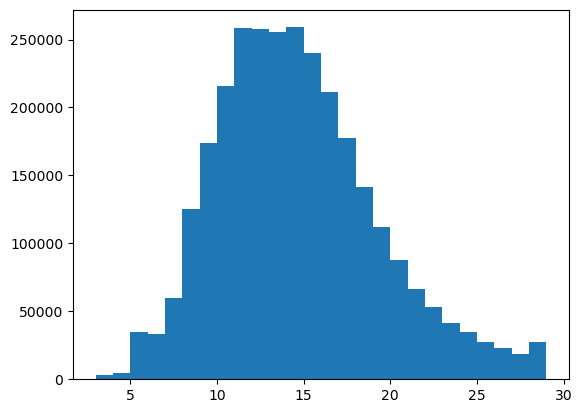

In [38]:
lengths = dataset["pronunciation"].apply(lambda x: len(x)).tolist()

print(np.mean(lengths), np.quantile(lengths, 0.975), np.std(lengths))
print(np.min(lengths), np.max(lengths))
plt.hist(lengths, np.max(lengths) - np.min(lengths))
plt.show()

In [39]:
SEQ_LEN = int(np.max(lengths))
BATCH_SIZE = 1024

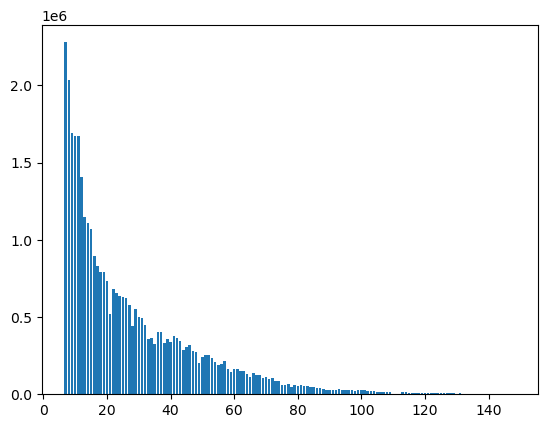

In [40]:
symbols_hist = {}
all_pronunciations = list(chain.from_iterable(dataset["pronunciation"].apply(lambda x: x[1:-1])))
symbols_hist = Counter(all_pronunciations)
sorted_hist =dict(sorted(symbols_hist.items(), key=lambda item: item[1], reverse=True)) 
plt.bar(sorted_hist.keys(), sorted_hist.values())
plt.show()

In [41]:
languages = (dataset["language"].value_counts()).to_dict()
print(languages)

{'Russian': 425128, 'French': 371170, 'Chinese': 326359, 'Finnish': 305573, 'Portuguese': 294741, 'Spanish': 257412, 'Latin': 174876, 'Polish': 133896, 'English': 124898, 'Italian': 78277, 'German': 70131, 'Hungarian': 64102, 'Vietnamese': 59673, 'Japanese': 50461, 'Czech': 45161, 'Hindi': 44506, 'Dutch': 44087, 'Korean': 22479, 'Greek': 15926, 'Thai': 15462, 'Arabic': 12313, 'Swedish': 5319, 'Hebrew': 2183}


In [42]:
phonetics_model = PhoneticTransformer(vocab, SEQ_LEN, languages)
print(sum(p.numel() for p in phonetics_model.parameters()))

4863488


In [43]:
# Save the parameters
phonetics_model.save_model_init_params("model_params")

In [21]:
phonetics_dataset = PhoneticsDataset(dataset, pronunciation_tokenizer, SEQ_LEN, BATCH_SIZE)
dataloaders = phonetics_dataset.get_data_loaders()
print(len(dataloaders))

Loading Russian
Loading French
Loading Chinese
Loading Finnish
Loading Portuguese
Loading Spanish
Loading Latin
Loading Polish
Loading English
Loading Italian
Loading German
Loading Hungarian
Loading Vietnamese
Loading Japanese
Loading Czech
Loading Hindi
Loading Dutch
Loading Korean
Loading Greek
Loading Thai
Loading Arabic
Loading Swedish
Loading Hebrew
23


In [22]:
optimizers = {}
max_len_epochs = 0
for x in languages.keys():
    optimizers[x] = optim.Adam(phonetics_model.get_language_gpt(x).parameters(), lr = 0.0001)
    max_len_epochs = max(max_len_epochs, len(dataloaders[x]))


In [24]:
criterion = nn.CrossEntropyLoss(ignore_index=vocab.get("[PAD]"))
EPOCHS = 5
EPOCH_SAVE_FREQUENCY = 1

for epoch in range(EPOCHS):
    for lang, dataloader in dataloaders.items():
        optimizer = optimizers[lang]
        total_loss = 0
        
        model = phonetics_model.get_language_gpt(lang)
        model.train()
        model.to(device)

        mini_epochs = int(np.floor(max_len_epochs / len(dataloader)))
        for m in range(mini_epochs):
            for i, (input_ids, target_ids) in tqdm(enumerate(dataloader), total=len(dataloader), desc='Batch', leave=False):
                optimizer.zero_grad()
                input_ids = input_ids.to(device)
                target_ids = target_ids.to(device)
                tgt_mask = generate_square_subsequent_mask(input_ids.size(1)).to(device)

                output = model(input_ids).logits

                loss = criterion(output.permute(0, 2, 1), target_ids)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()

        print(f"Epoch: {epoch + 1} Lang: {lang} Train Loss: {total_loss / (mini_epochs * len(dataloader))}")
        model.to("cpu")
        model.eval()

    if ((epoch + 1) % EPOCH_SAVE_FREQUENCY == 0):
        torch.save(phonetics_model.state_dict(), f"model{(int(4 + epoch/EPOCH_SAVE_FREQUENCY))}")
        

Epoch: 1 Lang: Russian Train Loss: 1.7760584695407977


Epoch: 1 Lang: French Train Loss: 1.8459343266552801


Epoch: 1 Lang: Chinese Train Loss: 1.4387906539402786


Epoch: 1 Lang: Finnish Train Loss: 1.8310484774535316


Epoch: 1 Lang: Portuguese Train Loss: 1.9071650749279394


Epoch: 1 Lang: Spanish Train Loss: 1.9041882426965804


Epoch: 1 Lang: Latin Train Loss: 1.8811169848804585


Epoch: 1 Lang: Polish Train Loss: 1.7912720802782753


Epoch: 1 Lang: English Train Loss: 2.3814717244580796


Epoch: 1 Lang: Italian Train Loss: 1.6194624467329546


Epoch: 1 Lang: German Train Loss: 2.0965706524641616


Epoch: 1 Lang: Hungarian Train Loss: 2.0401765316251725


Epoch: 1 Lang: Vietnamese Train Loss: 1.398073787839303


Epoch: 1 Lang: Japanese Train Loss: 1.517370694875717


Epoch: 1 Lang: Czech Train Loss: 1.976824465504399


Epoch: 1 Lang: Hindi Train Loss: 1.5824779982518669


Epoch: 1 Lang: Dutch Train Loss: 1.8648370197325042


Epoch: 1 Lang: Korean Train Loss: 1.4783865451210676


Epoch: 1 Lang: Greek Train Loss: 1.8037891920942526


Epoch: 1 Lang: Thai Train Loss: 1.333888293745426


Epoch: 1 Lang: Arabic Train Loss: 1.8145950359220688


Epoch: 1 Lang: Swedish Train Loss: 2.341911542242852


Epoch: 1 Lang: Hebrew Train Loss: 2.1135692115567157


Epoch: 2 Lang: Russian Train Loss: 1.7420556536660745


Epoch: 2 Lang: French Train Loss: 1.8172459786260096


Epoch: 2 Lang: Chinese Train Loss: 1.3912365369288526


Epoch: 2 Lang: Finnish Train Loss: 1.7871986763134449


Epoch: 2 Lang: Portuguese Train Loss: 1.8593338508572843


Epoch: 2 Lang: Spanish Train Loss: 1.8518217839891948


Epoch: 2 Lang: Latin Train Loss: 1.8370977190502904


Epoch: 2 Lang: Polish Train Loss: 1.7576231468118177


Epoch: 2 Lang: English Train Loss: 2.351709756694856


Epoch: 2 Lang: Italian Train Loss: 1.5846018989364823


Epoch: 2 Lang: German Train Loss: 2.062216653915995


Epoch: 2 Lang: Hungarian Train Loss: 2.0038812406479365


Epoch: 2 Lang: Vietnamese Train Loss: 1.3736893513012163


Epoch: 2 Lang: Japanese Train Loss: 1.496139484345913


Epoch: 2 Lang: Czech Train Loss: 1.9453907787063975


Epoch: 2 Lang: Hindi Train Loss: 1.5483067442070355


Epoch: 2 Lang: Dutch Train Loss: 1.8372479881903139


Epoch: 2 Lang: Korean Train Loss: 1.4432788328690962


Epoch: 2 Lang: Greek Train Loss: 1.762397762387991


Epoch: 2 Lang: Thai Train Loss: 1.3134374876434987


Epoch: 2 Lang: Arabic Train Loss: 1.7887299083746397


Epoch: 2 Lang: Swedish Train Loss: 2.2898921235172067


Epoch: 2 Lang: Hebrew Train Loss: 2.035500034617917


Epoch: 3 Lang: Russian Train Loss: 1.7166843411441033


Epoch: 3 Lang: French Train Loss: 1.7952735781998017


Epoch: 3 Lang: Chinese Train Loss: 1.356119961200463


Epoch: 3 Lang: Finnish Train Loss: 1.7538318490503624


Epoch: 3 Lang: Portuguese Train Loss: 1.8233820245497756


Epoch: 3 Lang: Spanish Train Loss: 1.813471544829626


Epoch: 3 Lang: Latin Train Loss: 1.802838315043533


Epoch: 3 Lang: Polish Train Loss: 1.7326364972209203


Epoch: 3 Lang: English Train Loss: 2.329176418768252


Epoch: 3 Lang: Italian Train Loss: 1.5596809442941244


Epoch: 3 Lang: German Train Loss: 2.034374135127966


Epoch: 3 Lang: Hungarian Train Loss: 1.9746899201125694


Epoch: 3 Lang: Vietnamese Train Loss: 1.3542505147670718


Epoch: 3 Lang: Japanese Train Loss: 1.480067105293274


Epoch: 3 Lang: Czech Train Loss: 1.9206221012421596


Epoch: 3 Lang: Hindi Train Loss: 1.5220662436702035


Epoch: 3 Lang: Dutch Train Loss: 1.8166042259245208


Epoch: 3 Lang: Korean Train Loss: 1.415676479989832


Epoch: 3 Lang: Greek Train Loss: 1.7276084589270444


Epoch: 3 Lang: Thai Train Loss: 1.297815320870051


Epoch: 3 Lang: Arabic Train Loss: 1.768931741324755


Epoch: 3 Lang: Swedish Train Loss: 2.247235383388501


Epoch: 3 Lang: Hebrew Train Loss: 1.9608528591008578


Epoch: 4 Lang: Russian Train Loss: 1.6961742857327828


Epoch: 4 Lang: French Train Loss: 1.7773693241692115


Epoch: 4 Lang: Chinese Train Loss: 1.3297815812418827


Epoch: 4 Lang: Finnish Train Loss: 1.727487946832459


Epoch: 4 Lang: Portuguese Train Loss: 1.7957341343992286


Epoch: 4 Lang: Spanish Train Loss: 1.7842501803996071


Epoch: 4 Lang: Latin Train Loss: 1.776200959208416


Epoch: 4 Lang: Polish Train Loss: 1.7130292732903671


Epoch: 4 Lang: English Train Loss: 2.3111082523898347


Epoch: 4 Lang: Italian Train Loss: 1.5408446630874237


Epoch: 4 Lang: German Train Loss: 2.0112697539698097


Epoch: 4 Lang: Hungarian Train Loss: 1.9508405841847576


Epoch: 4 Lang: Vietnamese Train Loss: 1.3397613498258245


Epoch: 4 Lang: Japanese Train Loss: 1.4679833891987801


Epoch: 4 Lang: Czech Train Loss: 1.900890694429845


Epoch: 4 Lang: Hindi Train Loss: 1.500553075412307


Epoch: 4 Lang: Dutch Train Loss: 1.799247311823296


Epoch: 4 Lang: Korean Train Loss: 1.3948066902883125


Epoch: 4 Lang: Greek Train Loss: 1.6981693961872504


Epoch: 4 Lang: Thai Train Loss: 1.2851787375716062


Epoch: 4 Lang: Arabic Train Loss: 1.7584864591749816


Epoch: 4 Lang: Swedish Train Loss: 2.2049024191455566


Epoch: 4 Lang: Hebrew Train Loss: 1.8912344405040649


Epoch: 5 Lang: Russian Train Loss: 1.6788573067348738


Epoch: 5 Lang: French Train Loss: 1.763049802504295


Epoch: 5 Lang: Chinese Train Loss: 1.309171369456946


Epoch: 5 Lang: Finnish Train Loss: 1.705667706237589


Epoch: 5 Lang: Portuguese Train Loss: 1.7739558948410883


Epoch: 5 Lang: Spanish Train Loss: 1.7613478932115767


Epoch: 5 Lang: Latin Train Loss: 1.7542272513372856


Epoch: 5 Lang: Polish Train Loss: 1.69662051376799


Epoch: 5 Lang: English Train Loss: 2.295575442209921


Epoch: 5 Lang: Italian Train Loss: 1.5259121910318152


Epoch: 5 Lang: German Train Loss: 1.9912931464144572


Epoch: 5 Lang: Hungarian Train Loss: 1.9302373358181544


Epoch: 5 Lang: Vietnamese Train Loss: 1.3288166344021481


Epoch: 5 Lang: Japanese Train Loss: 1.4582502093911172


Epoch: 5 Lang: Czech Train Loss: 1.8837541777410625


Epoch: 5 Lang: Hindi Train Loss: 1.4822898561304265


Epoch: 5 Lang: Dutch Train Loss: 1.783776713140083


Epoch: 5 Lang: Korean Train Loss: 1.378673156403532


Epoch: 5 Lang: Greek Train Loss: 1.6717715501212156


Epoch: 5 Lang: Thai Train Loss: 1.2746241061160197


Epoch: 5 Lang: Arabic Train Loss: 1.742937105206343


Epoch: 5 Lang: Swedish Train Loss: 2.1659401839482038


Epoch: 5 Lang: Hebrew Train Loss: 1.8274296838880162


In [25]:
def generate(model, pad_token_id, top_k = 50, top_p = 0.95, language_temps = None, temperature = 1.0):
    input_ids = pronunciation_tokenizer.encode("").ids[:-1]
    output = model.generate(
        input_ids,
        pad_token_id = pad_token_id,
        no_repeat_ngram_size=0,  # Prevent repetition
        do_sample = True,
        top_k=top_k,  # Limits the sampling pool to top_k tokens
        top_p=top_p,  # Cumulative probability for nucleus sampling
        language_temps = language_temps,
        temperature=temperature,  # Adjust the randomness of predictions,
    )
    output = pronunciation_tokenizer.decode(output[0][1:-1].cpu().numpy())
    return output

In [26]:
languages = (1.0 / df["language"].value_counts(normalize=True)).to_dict()
phonetics_model = PhoneticTransformer(vocab, SEQ_LEN, languages)
phonetics_model.load_state_dict(torch.load("model8"))
phonetics_model.to_device("cpu")
phonetics_model.eval()
languages = {
    "Korean": 1,
    "Swedish": 2,
}
temps = {
    "German": 0.2
}

phonetics_model.set_language_weights(languages)
for _ in range(10):
    o = generate(phonetics_model, vocab["[PAD]"], top_k=50, top_p=0.95, language_temps = temps, temperature=1.0)
    print(o)

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_19888\987338028.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  phonetics_model.load_state_dict(torch.load("model8"))


²
ˈtɛ(ː)lʊt͡nɛ
ma̠ʊ²iː)œoəɯ
ʉːl
oːrtʰ
a¹ɧuːn
tuː
ɕɧɛjleː)]r
ɛkɪ²iːla
hɛrːtʰːn


In [27]:
pronunciation_tokenizer.save_pretrained("C:\\Users\\Joaquin\\Desktop\\Playground\\ML\\ChaosLang\\models")